# Import data

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_csv('placement.csv')

In [87]:
df.shape

(1000, 3)

In [88]:
df.sample(5)

,cgpa,placement_exam_marks,placed
797,8.14,20.0,1
751,6.69,20.0,1
349,8.12,16.0,0
140,6.85,22.0,1
977,7.18,49.0,0


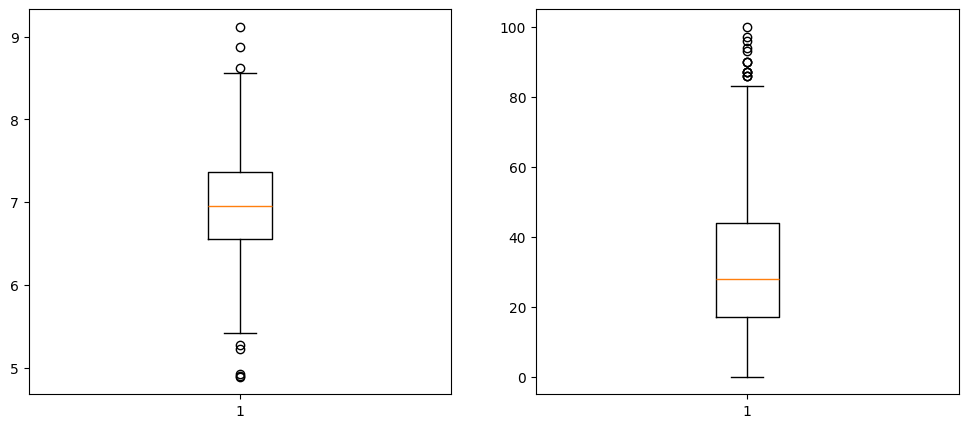

In [89]:
fig = plt.figure(figsize=(12, 5))

ax1 = plt.subplot(121)
ax1.boxplot(df['cgpa'])

ax2 = plt.subplot(122)
ax2.boxplot(df['placement_exam_marks'])

plt.show()

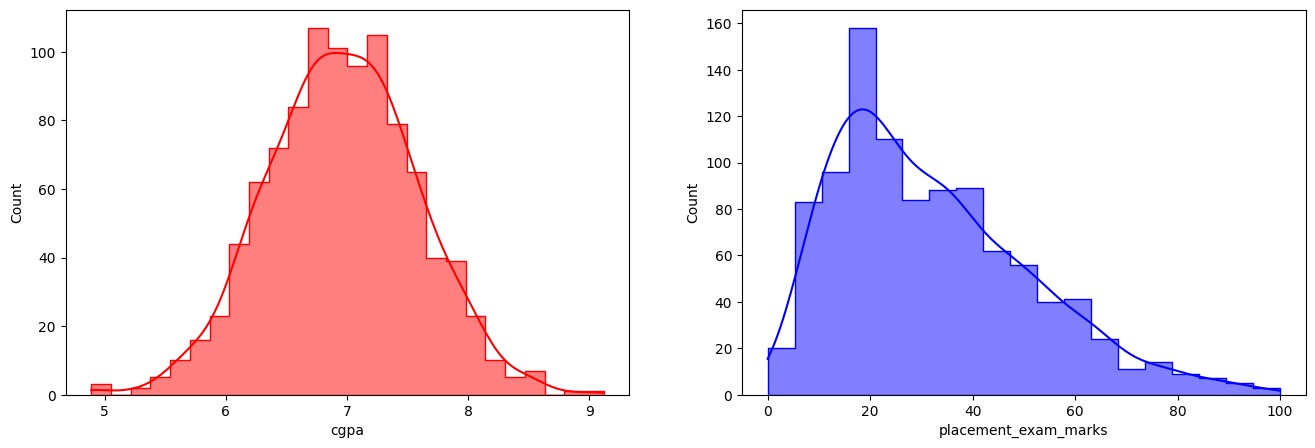

In [90]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True, element='step', color='red')

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True, element='step', color='blue')

plt.show()

In [91]:
# This column is not normal distributed 
# so we don't use the zscore to remove outliers
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [92]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [93]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [94]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Trimming

In [95]:
# Trimming

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


##  Approach 2

In [96]:
# Approach 2

# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [97]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [98]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [99]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [100]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [101]:
# Trimming 
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [102]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


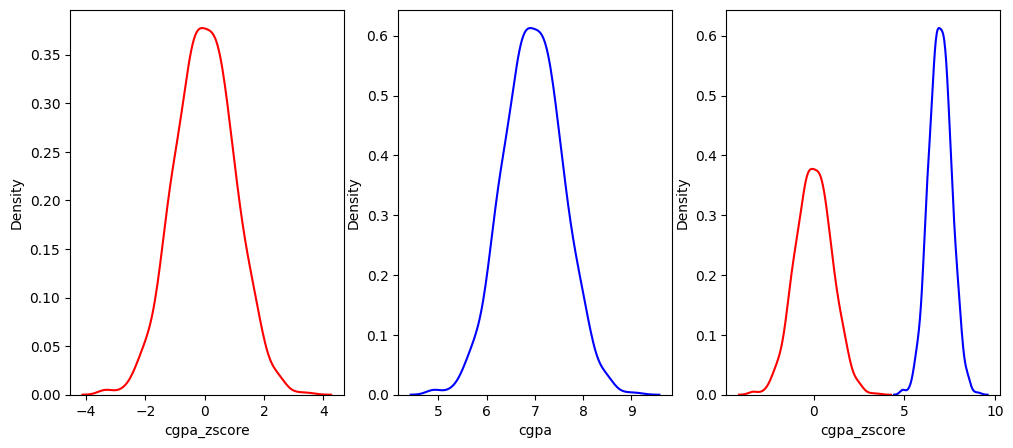

In [103]:
plt.figure(figsize=(12, 5))

ax1 = plt.subplot(1,3,1)
sns.kdeplot(df['cgpa_zscore'], color='red', ax=ax1)

ax2 = plt.subplot(1,3,2)
sns.kdeplot(df['cgpa'], color='blue', ax=ax2)

ax3 = plt.subplot(1,3, 3)
sns.kdeplot(df['cgpa_zscore'], color='red', ax=ax3)
sns.kdeplot(df['cgpa'], color='blue', ax=ax3)

plt.show()

## Capping

In [104]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [105]:
lower_limit

np.float64(5.113546374602832)

In [106]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [107]:
df.shape

(1000, 4)

In [108]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64